### Breast Cancer Prediction
The objective of this project is to create a predictive model that can accurately classify breast
cancer cases as benign or malignant based on a set of relevant features. By leveraging
historical data and applying machine learning techniques, we aim to develop a reliable tool for
assisting medical professionals in diagnosing breast cancer.

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv(r"D:\ICTAK\DSA\data\data.csv")


In [3]:
# Check the first few rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Missing Value Handling

In [7]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# Drop the "Unnamed: 32" column beacuase it is a empty column
data = data.drop("Unnamed: 32", axis=1)

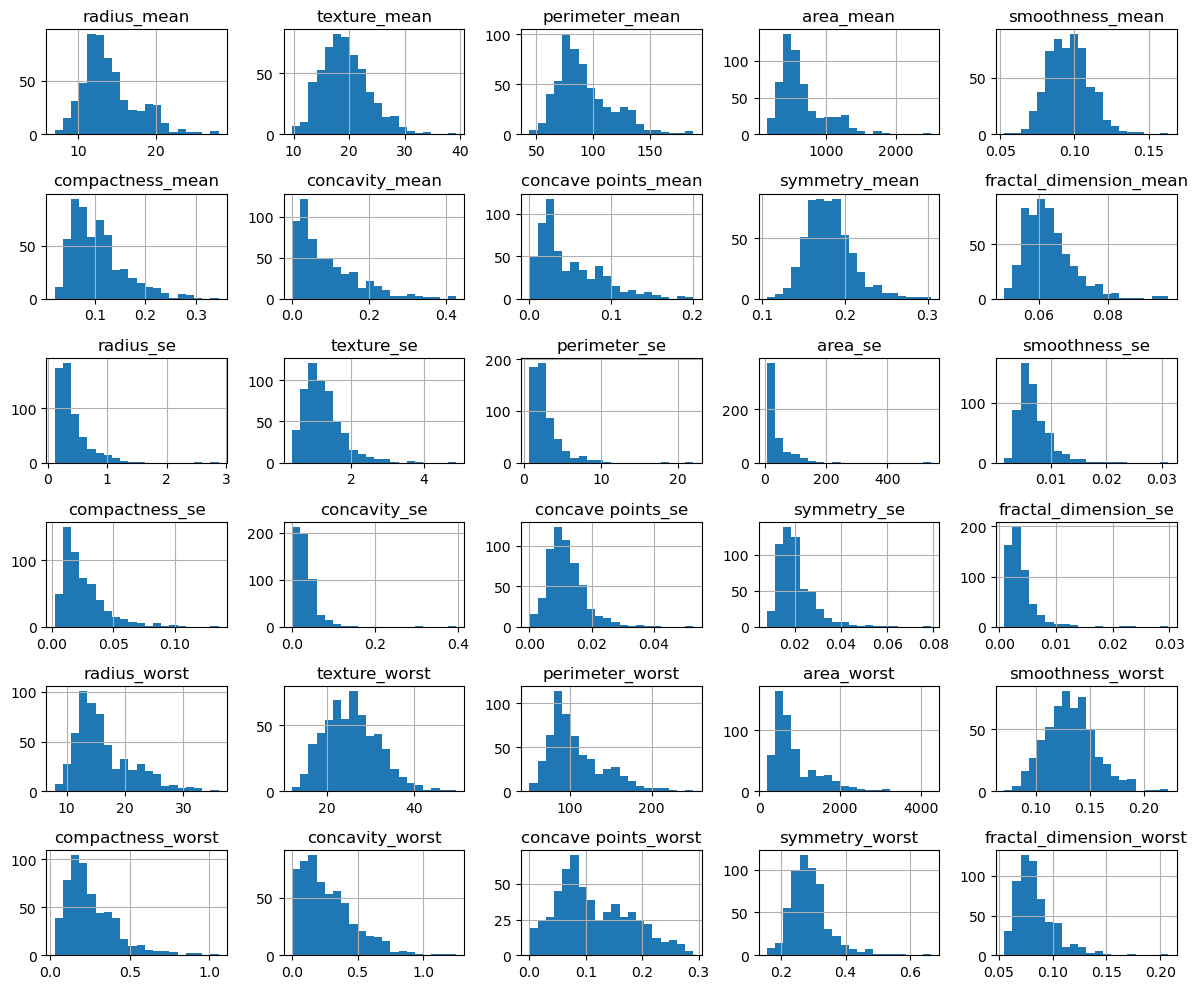

In [9]:
# Plot histograms for numeric features
numeric_features = data.select_dtypes(include=['float64'])
numeric_features.hist(bins=20, figsize=(12, 10))
plt.tight_layout()

plt.show()

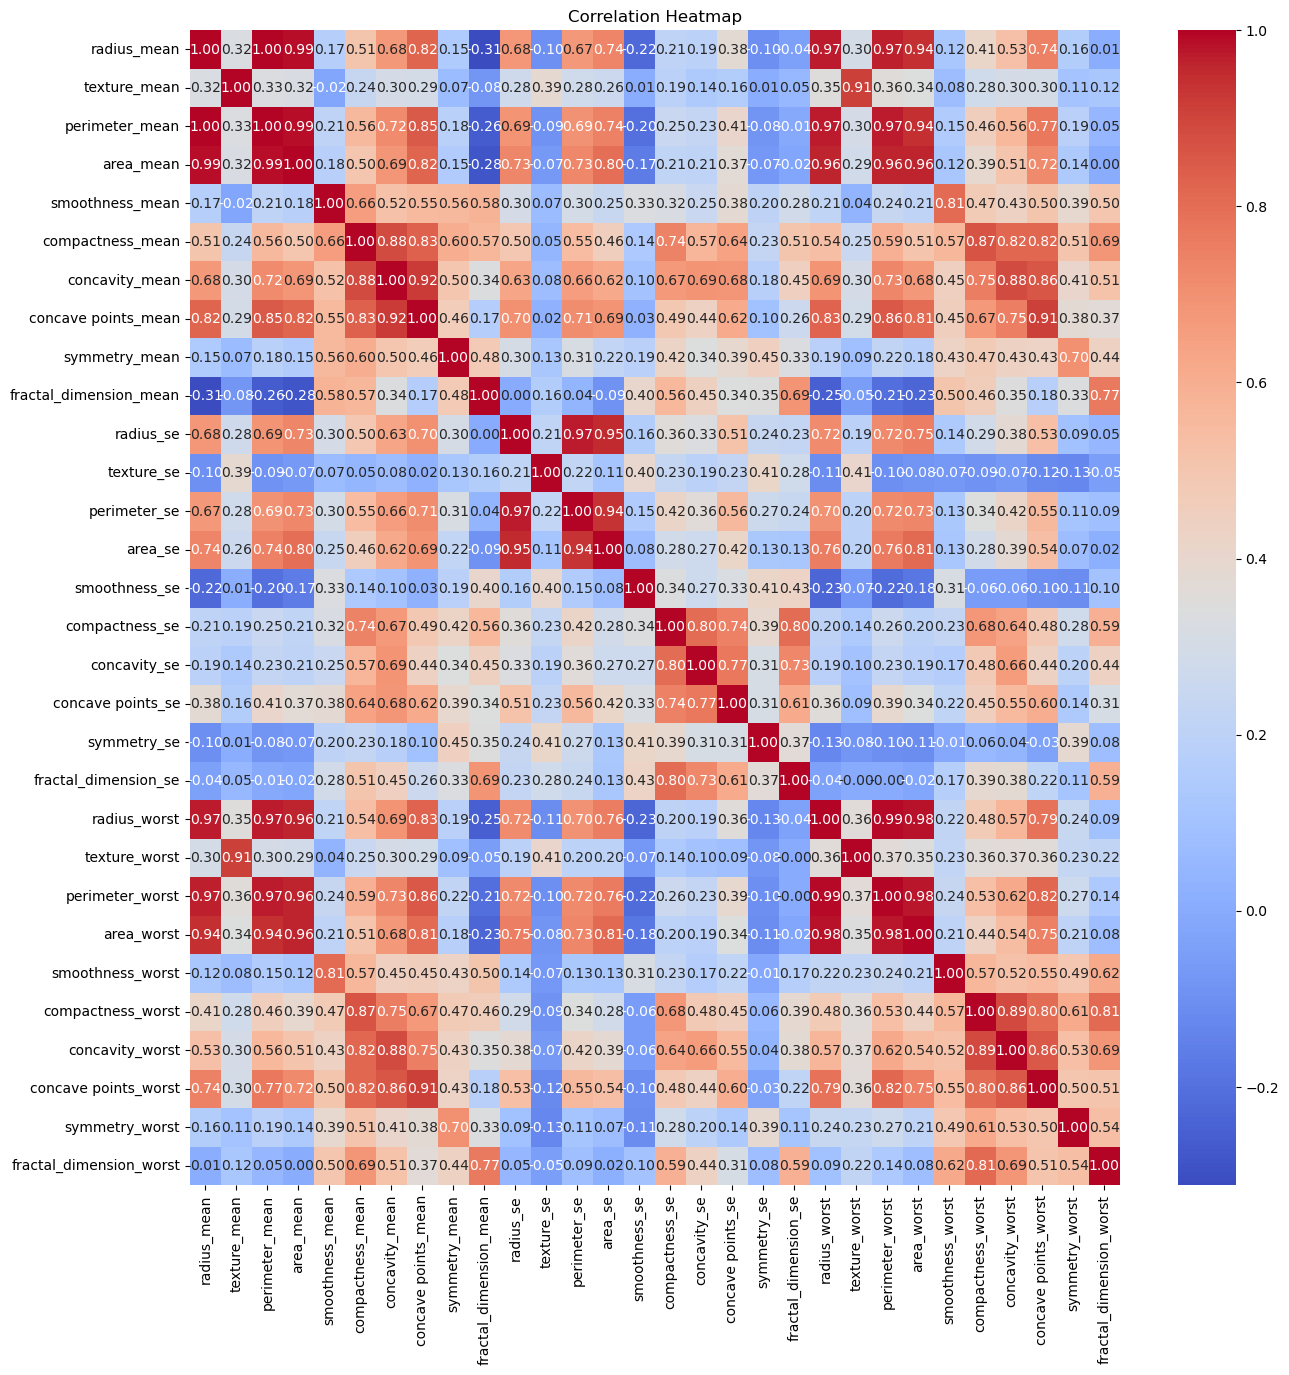

In [10]:
# Calculate the correlation matrix
correlation_matrix = data[numeric_features.columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

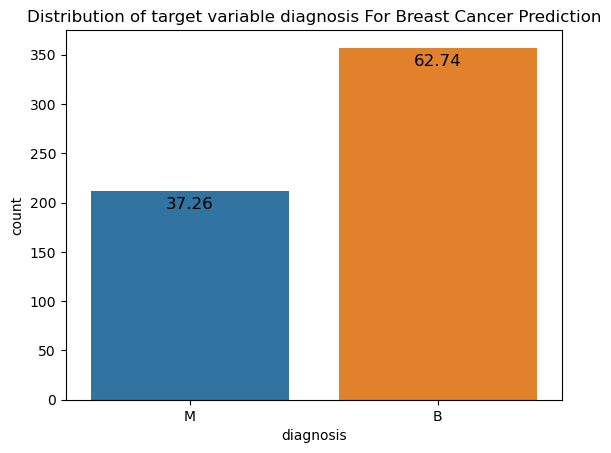

In [12]:
#churn rate
ax = sns.countplot(x='diagnosis', data=data)
x_labels= ['M', 'B']



ax.set_xticklabels(x_labels)
plt.title('Distribution of target variable diagnosis For Breast Cancer Prediction')

for a in ax.patches:
    ax.annotate(format((a.get_height()/569)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

cols = []
for i in data.columns:
    if data[i].dtype == 'object':
        cols.append(i)

labelencoder = LabelEncoder()
mapping =[]
for i in cols:
    data[i] = labelencoder.fit_transform(data[i])
    lemap = dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
    mapping.append(lemap)

print(f"Mapped labels of the features in data are {mapping}")

Mapped labels of the features in data are [{'B': 0, 'M': 1}]


In [14]:
# Function to plot the distribution of numerical variable
def plot_num_var(var_name, var_label, bin_num):
    plt.figure(figsize = (25,5))
    plt.suptitle('Distribution of {}'.format(var_name))
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=var_name, bins=bin_num)
  #plt.title('Fig {}(a)'.format(fig_num))
    plt.xlabel(var_name)
    plt.ylabel('Count')

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=var_name)
 # plt.title('Fig {}(b)'.format(fig_num))
    plt.xlabel(var_name)
  
    plt.show()

In [15]:
# Function to plot the distribution of numerical variable by Churn value
def plot_numvar_diagnosis(var_name, var_label, bin_num):
    plt.figure(figsize = (25,5))
    plt.suptitle('Distribution of {} by diagnosis value'.format(var_label))
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=var_name, hue='diagnosis', bins=bin_num)
 # plt.title('Fig {}(a)'.format(fig_num))
    plt.xlabel(var_label)
    plt.ylabel('Count')
  
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x='diagnosis', y=var_name)
  #plt.title('Fig {}(b)'.format(fig_num))
    plt.xlabel('diagnosis value')
  
    plt.show()

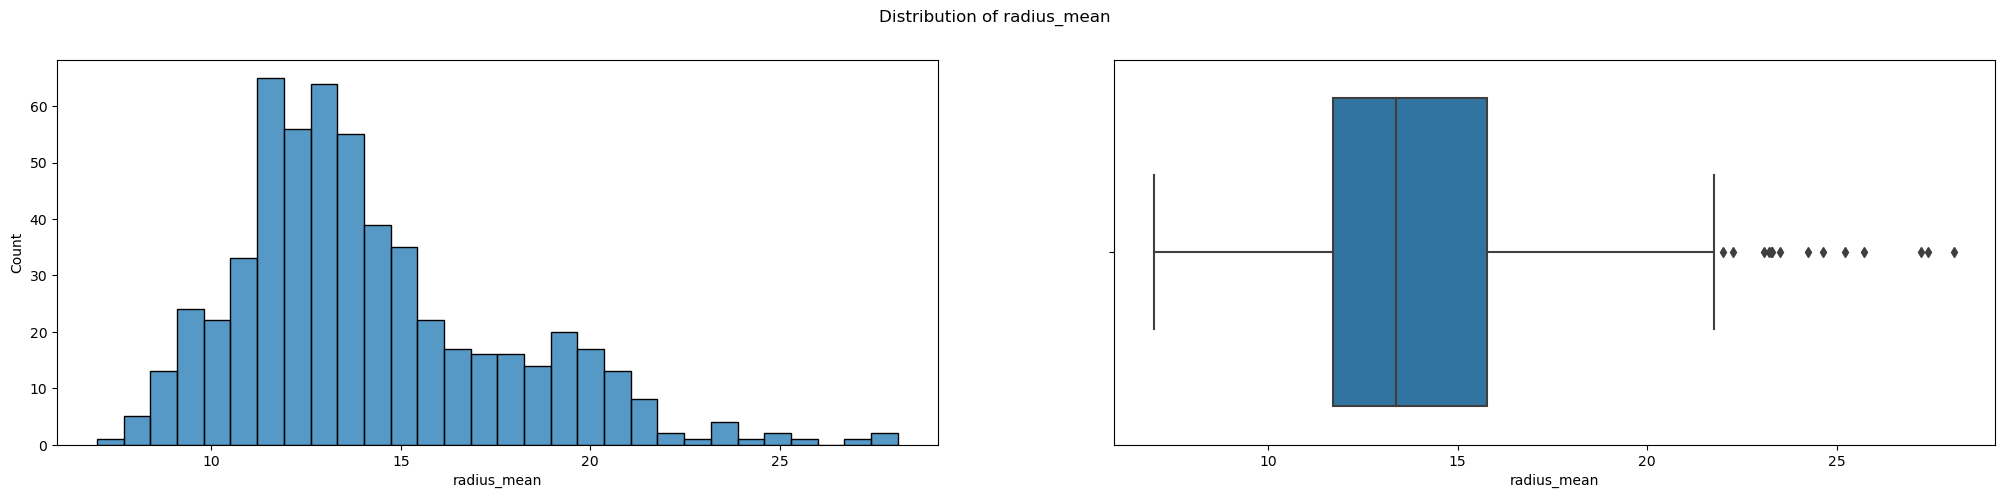

In [16]:
# Distribution of Tenure of the customers with the ecommerce platform
plot_num_var('radius_mean', 'diagnosis', 30)

In [17]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]
pd.DataFrame(data['radius_mean'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
radius_mean,569.0,14.127292,3.524049,6.981,10.26,11.366,11.7,12.012,12.726,13.37,14.058,15.056,15.78,17.068,19.53,24.3716,28.11


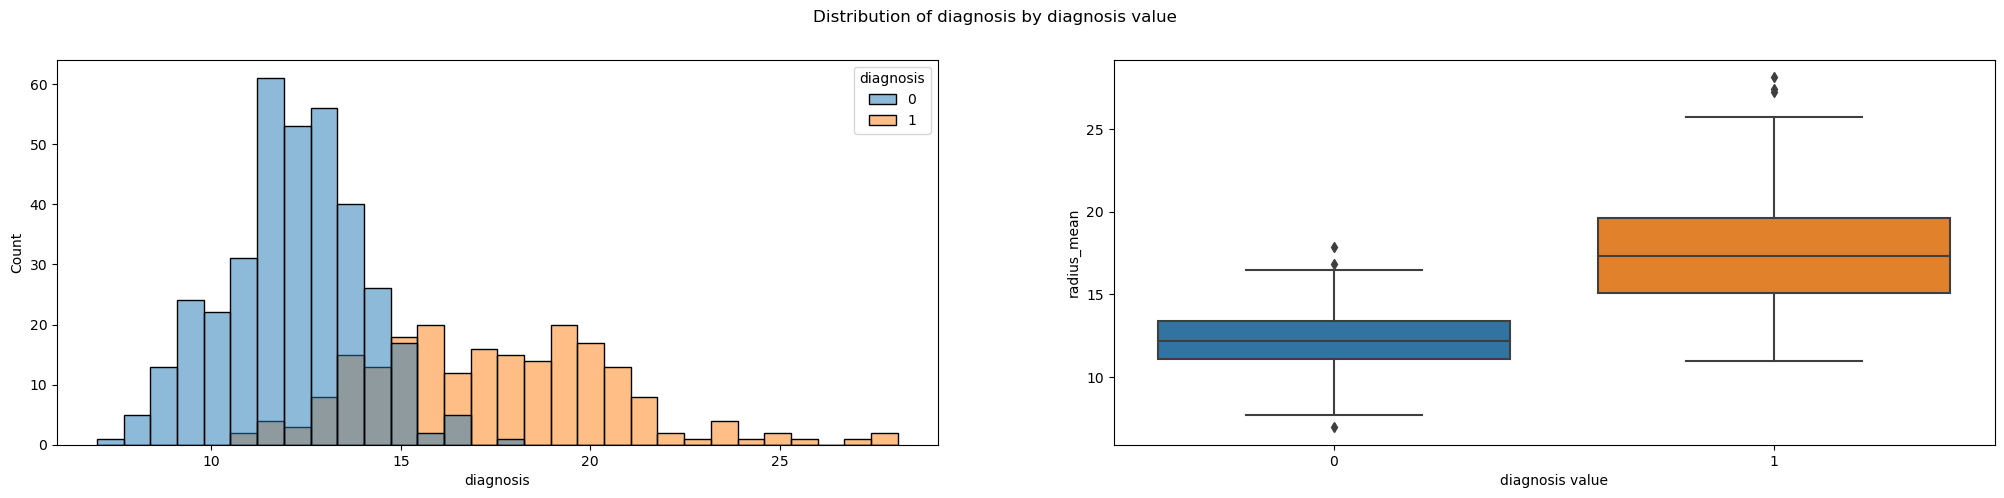

In [18]:
# Distribution of radius_mean of customers by diagnosis value
plot_numvar_diagnosis('radius_mean', 'diagnosis', 30)

In [19]:
data.groupby('diagnosis')['radius_mean'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
diagnosis,,,,,,,,,,,,,,,,,
0,357.0,12.146524,1.780512,6.981,9.7266,10.670,11.080,11.318,11.722,12.200,12.662,13.050,13.37,13.648,14.452,16.2272,17.85
1,212.0,17.462830,3.203971,10.950,13.6100,14.616,15.075,15.460,16.244,17.325,18.286,19.204,19.59,20.154,21.075,27.0561,28.11


It's evident that malignant cases tend to have a higher mean radius_mean value compared to benign cases, as expected. The standard deviation also indicates the greater variability in radius_mean for malignant cases.

In [20]:
# Drop the "Unnamed: 32" column beacuase it is a empty column
data = data.drop("id", axis=1)

In [21]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Outlier Handling

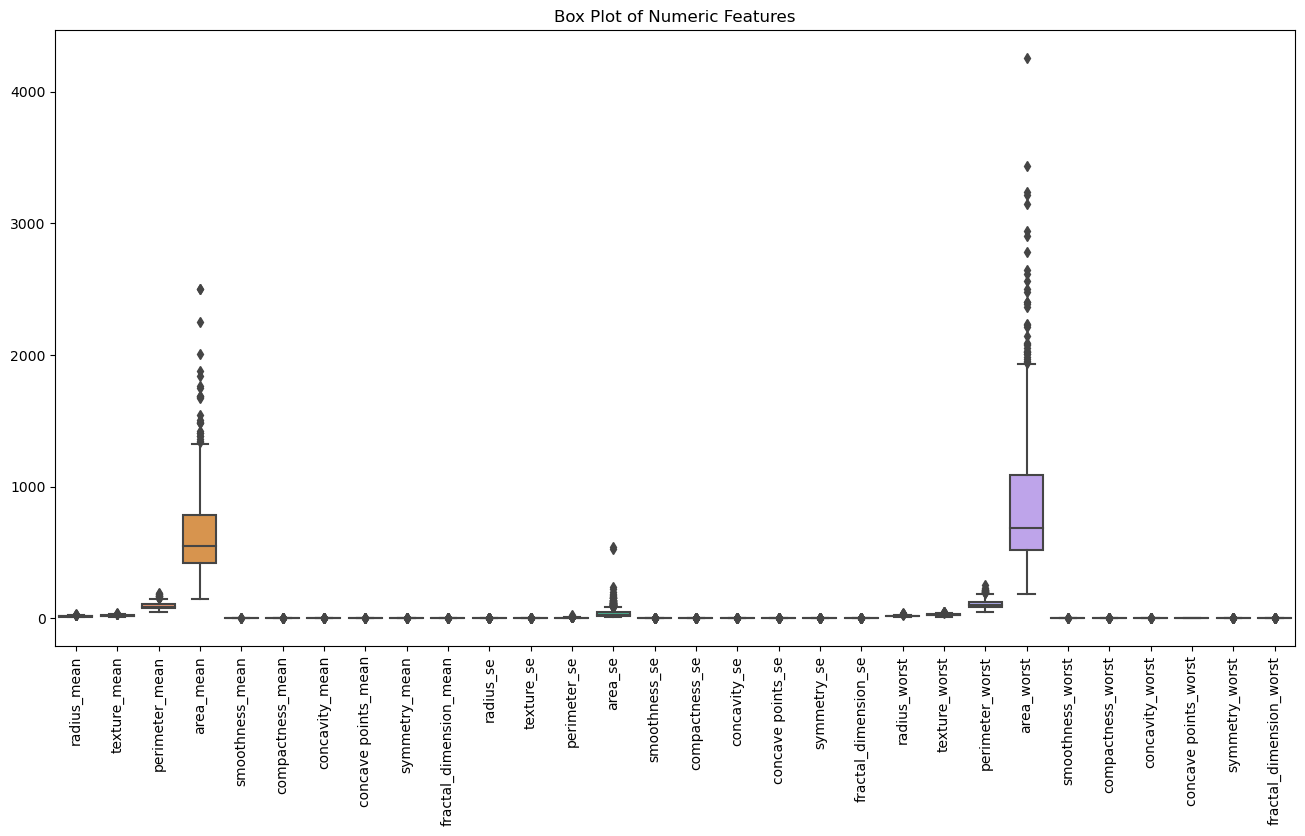

In [22]:
# Select numeric features for outlier check
numeric_features = data.select_dtypes(include=['float64'])

# Create box plots for numeric features
plt.figure(figsize=(16, 8))
sns.boxplot(data=numeric_features)
plt.xticks(rotation=90)
plt.title('Box Plot of Numeric Features')
plt.show()

In [23]:
import pandas as pd

# Assuming you have a DataFrame df with multiple numeric columns

# Define the IQR-based capping function
def iqr_capping(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply the capping function to all numeric columns
numeric_columns = data.select_dtypes(include=['number'])
data_capped = numeric_columns.apply(iqr_capping)

# Concatenate the capped columns back to the original DataFrame
data[data_capped.columns] = data_capped

# Now, df contains all numeric columns with IQR-based capping


### Feature Selection

In [24]:
# Function to perform statistical test on numerical variables to determine whether to reject or accept H0
def num_stats(num_col):
  group_0 = data[data['diagnosis']==0][num_col]
  group_1 = data[data['diagnosis']==1][num_col]

  _, p_value = stats.ttest_ind(group_0,group_1,equal_var=False)

  print('P-value : ', p_value)
  if(p_value<0.05):
    print('Reject null hypothesis')
  else:
    print('Do not reject null hypotheis')

In [25]:
# Select numeric features for outlier check
num_col_list = data.select_dtypes(include=['float64'])

In [26]:
for col in num_col_list:
  print('Column Name : ', col)
  num_stats(col)
  print('---------------------------------------------')

Column Name :  radius_mean
P-value :  3.791024612192079e-72
Reject null hypothesis
---------------------------------------------
Column Name :  texture_mean
P-value :  1.8278901648714235e-26
Reject null hypothesis
---------------------------------------------
Column Name :  perimeter_mean
P-value :  6.15388795943496e-75
Reject null hypothesis
---------------------------------------------
Column Name :  area_mean
P-value :  3.959134143482203e-66
Reject null hypothesis
---------------------------------------------
Column Name :  smoothness_mean
P-value :  8.243132885654298e-20
Reject null hypothesis
---------------------------------------------
Column Name :  compactness_mean
P-value :  1.1735791755172343e-46
Reject null hypothesis
---------------------------------------------
Column Name :  concavity_mean
P-value :  7.442916156468282e-67
Reject null hypothesis
---------------------------------------------
Column Name :  concave points_mean
P-value :  2.3208564754205964e-76
Reject null h

In [27]:
# drop this columns
data=data.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se'],axis=1)

### Modelling

In [28]:
from sklearn.model_selection import train_test_split

X = data.drop('diagnosis', axis=1)  # Features (excluding the target)
y = data['diagnosis']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)


In [30]:
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print(classification_rep)


Accuracy: 0.96
ROC-AUC: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [32]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_clf.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_roc_auc = roc_auc_score(y_test, y_pred_best)
best_classification_rep = classification_report(y_test, y_pred_best)

print(f'Best Parameters: {best_params}')
print(f'Best Accuracy: {best_accuracy:.2f}')
print(f'Best ROC-AUC: {best_roc_auc:.2f}')
print(best_classification_rep)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.96
Best ROC-AUC: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
     

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [35]:

lr_y_pred = model.predict(X_test)
     

In [36]:

accuracy_lr = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

Logistic Regression Accuracy: 0.9561


In [37]:
classification_rep_lr = classification_report(y_test, lr_y_pred )
print("Classification Report:\n", classification_rep_lr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

k_val = np.arange(3,25)
acc_val = []
for k in k_val:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(X_train, y_train)
    pred  = classifier.predict(X_test)
    acc = accuracy_score(y_test,pred)
    acc_val.append(acc)

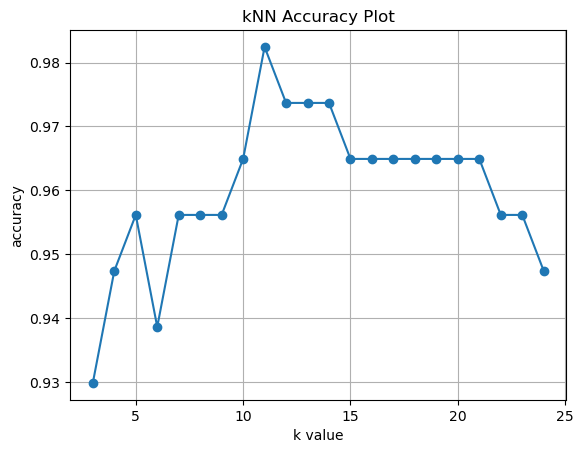

In [39]:
plt.plot(k_val,acc_val,'o-')
plt.title('kNN Accuracy Plot')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [41]:
classifier = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [42]:
y_pred_knn  = classifier.predict(X_test)

In [43]:

accuracy_knn = accuracy_score(y_test, y_pred_knn )
print(f"K Nearest Neighbors Accuracy: {accuracy_lr:.4f}")

K Nearest Neighbors Accuracy: 0.9561


In [44]:
classification_rep_knn = classification_report(y_test, y_pred_knn )
print("Classification Report:\n", classification_rep_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [48]:
results = pd.DataFrame({
    'Model':[ 'Random Forest','Logistic regression','KNN'],
    'Score':[ accuracy,accuracy_lr,accuracy_knn]})

results= results.sort_values(by='Score', ascending=False)

results.head(9)

,Model,Score
2,KNN,0.973684
0,Random Forest,0.964912
1,Logistic regression,0.956140


KNN algorithm gives most accuracy